In [3]:
import importlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing as mp
from pathlib import PurePath, Path
import pyarrow
import scipy.stats as stats
import scipy
from statsmodels.tsa.stattools import adfuller
import time
import sys


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC


from book_functions import *

importlib.reload(sys.modules['book_functions'])
# importlib.reload(sys.modules['sklearn'])

<module 'book_functions' from 'C:\\Users\\mlevy\\Workspace\\Advances-in-Financial-Machine-Learning\\advances-in-financial-machine-learning\\book_functions.py'>

KstestResult(statistic=0.011037248771065572, pvalue=0.17483028658455882)
count    10000.000000
mean        73.508130
std        175.113792
min          0.001003
25%          0.027356
50%          1.004072
75%         33.583280
max        999.165347
dtype: float64


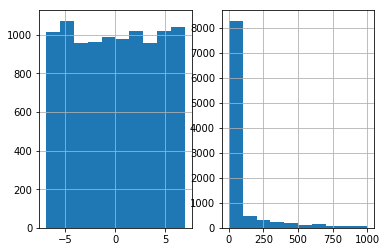

In [10]:
a,b,size=1E-3,1E3,10000
vals=logUniform(a=a,b=b).rvs(size=size)
print(kstest(rvs=np.log(vals),cdf='uniform',args=(np.log(a),np.log(b/a)),N=size))
print(pd.Series(vals).describe())
plt.subplot(121)
pd.Series(np.log(vals)).hist()
plt.subplot(122)
pd.Series(vals).hist()
plt.show()

In [ ]:
# clfHyperFit example
'''
X, cont = getTestData(n_features=10, n_informative=5, n_redundant=0, n_samples=10000)
# param_grid={'clf__C':[1E2,1E-1,1,10,100], 'clf__gamma':[1E-2,1E-1,1,10,100]}
param_grid={'clf__C':[1], 'clf__gamma':[1]}
clf = SVC(kernel='rbf', probability=True)
pipe_clf = MyPipeline([('clf', clf)])
# fit_params = {'sample_weight': cont['w'].values}   # this might not be right
fit_params = dict()

gs = clfHyperFit(X, cont['bin'], t1=cont['t1'], pipe_clf=pipe_clf, param_grid=param_grid, cv=10,
                rndSearchIter=0, n_jobs=-1, pctEmbargo=0, scoring='neg_log_loss', **fit_params)
'''

In [4]:
# 9.1
X, cont = getTestData(n_features=10, n_informative=5, n_redundant=0, n_samples=10000)

C:\Users\mlevy\Workspace\Advances-in-Financial-Machine-Learning\advances-in-financial-machine-learning\book_functions.py:535: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  end=pd.datetime.today())


In [3]:
# a
scoring = 'neg_log_loss'
inner_cv = PurgedKFold(n_splits=10, t1=cont['t1'], pctEmbargo=0)
clf = SVC(kernel='rbf', probability=True)
param_grid={'C':[1E2,1E-1,1,10,100], 'gamma':[1E-2,1E-1,1,10,100]}

In [5]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid,
                  scoring=scoring, cv=inner_cv, n_jobs=1, iid=False, verbose=2)

In [6]:
%%time
gs = gs.fit(X, cont['bin'])

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] C=100.0, gamma=0.01 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=100.0, gamma=0.01, total=   7.6s
[CV] C=100.0, gamma=0.01 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] .............................. C=100.0, gamma=0.01, total=   7.7s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .............................. C=100.0, gamma=0.01, total=   7.5s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .............................. C=100.0, gamma=0.01, total=   7.4s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .............................. C=100.0, gamma=0.01, total=   7.4s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .............................. C=100.0, gamma=0.01, total=   6.4s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .............................. C=100.0, gamma=0.01, total=   6.4s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .............................. C=100.0, gamma=0.01, total=   6.9s
[CV] C=100.0, gamma=0.01 .............................................
[CV] .

[CV] ................................ C=0.1, gamma=0.01, total=   5.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   6.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   6.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   6.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   6.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   7.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   7.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................... C=1, gamma=0.1, total=   3.9s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   3.9s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   3.9s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=  15.3s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=  15.5s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=  15.8s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=  16.9s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] .................................... C=10, gamma=1, total=  14.8s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=  14.9s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=  14.5s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=  15.4s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=  15.5s
[CV] C=10, gamma=10 ..................................................
[CV] ................................... C=10, gamma=10, total=  20.1s
[CV] C=10, gamma=10 ..................................................
[CV] ................................... C=10, gamma=10, total=  19.1s
[CV] C=10, gamma=10 ..................................................
[CV] .

[CV] .................................. C=100, gamma=10, total=  20.2s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=  18.4s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=  18.6s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=  18.9s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=  12.8s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=  18.6s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=  18.4s
[CV] C=100, gamma=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 75.4min finished


Wall time: 1h 15min 30s


In [ ]:
# b) 25 nodes
# c) 250 fits
# d) time = 75.4min (n_jobs=1)
# e) optimal results = gs.best_estimator_
# f) CV score from: gs.cv_results_
# g) Use MyPipeline  #TODO show how to implement
### verbose output
# Fitting 10 folds for each of 25 candidates, totalling 250 fits
# [CV] C=100.0, gamma=0.01 .............................................

In [33]:
# 2a
param_distributions={'C':logUniform(a=1E-2,b=1E2),'gamma':logUniform(a=1E-2,b=1E2)}
rs = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, scoring=scoring, cv=inner_cv, n_jobs=1,
                                iid=False, n_iter=25, verbose=2)

In [34]:
%%time
rs = rs.fit(X, cont['bin'])

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   4.2s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   4.1s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   4.2s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   4.2s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   4.2s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   3.5s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   3.5s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .. C=0.5261444974606299, gamma=0.04191664933218859, total=   3.9s
[CV] C=0.5261444974606299, gamma=0.04191664933218859 .................
[CV] .

[CV] ... C=0.06924820234532507, gamma=0.291196354735246, total=   9.3s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] ...... C=2.743437231449079, gamma=7.77315834029313, total=  18.9s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] ...... C=2.743437231449079, gamma=7.77315834029313, total=  18.0s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] ...... C=2.743437231449079, gamma=7.77315834029313, total=  14.1s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] ...... C=2.743437231449079, gamma=7.77315834029313, total=  19.3s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] ...... C=2.743437231449079, gamma=7.77315834029313, total=  17.4s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] ...... C=2.743437231449079, gamma=7.77315834029313, total=  18.3s
[CV] C=2.743437231449079, gamma=7.77315834029313 .....................
[CV] .

[CV] .. C=0.012011158180773444, gamma=65.16878548991107, total=  28.1s
[CV] C=0.012011158180773444, gamma=65.16878548991107 .................
[CV] .. C=0.012011158180773444, gamma=65.16878548991107, total=  30.7s
[CV] C=0.012011158180773444, gamma=65.16878548991107 .................
[CV] .. C=0.012011158180773444, gamma=65.16878548991107, total=  37.4s
[CV] C=26.45672098625652, gamma=0.014890727872720035 .................
[CV] .. C=26.45672098625652, gamma=0.014890727872720035, total=   7.3s
[CV] C=26.45672098625652, gamma=0.014890727872720035 .................
[CV] .. C=26.45672098625652, gamma=0.014890727872720035, total=   8.2s
[CV] C=26.45672098625652, gamma=0.014890727872720035 .................
[CV] .. C=26.45672098625652, gamma=0.014890727872720035, total=   7.7s
[CV] C=26.45672098625652, gamma=0.014890727872720035 .................
[CV] .. C=26.45672098625652, gamma=0.014890727872720035, total=   8.3s
[CV] C=26.45672098625652, gamma=0.014890727872720035 .................
[CV] .

[CV] ... C=0.20032256350150301, gamma=16.23700086456429, total=  27.5s
[CV] C=0.20032256350150301, gamma=16.23700086456429 ..................
[CV] ... C=0.20032256350150301, gamma=16.23700086456429, total=  24.6s
[CV] C=0.20032256350150301, gamma=16.23700086456429 ..................
[CV] ... C=0.20032256350150301, gamma=16.23700086456429, total=  25.8s
[CV] C=0.20032256350150301, gamma=16.23700086456429 ..................
[CV] ... C=0.20032256350150301, gamma=16.23700086456429, total=  27.1s
[CV] C=0.20032256350150301, gamma=16.23700086456429 ..................
[CV] ... C=0.20032256350150301, gamma=16.23700086456429, total=  25.3s
[CV] C=51.07478388079697, gamma=2.8413665940794854 ...................
[CV] .... C=51.07478388079697, gamma=2.8413665940794854, total=  22.3s
[CV] C=51.07478388079697, gamma=2.8413665940794854 ...................
[CV] .... C=51.07478388079697, gamma=2.8413665940794854, total=  22.8s
[CV] C=51.07478388079697, gamma=2.8413665940794854 ...................
[CV] .

[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  15.3s
[CV] C=0.45353034937705705, gamma=4.701474490897457 ..................
[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  15.3s
[CV] C=0.45353034937705705, gamma=4.701474490897457 ..................
[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  13.9s
[CV] C=0.45353034937705705, gamma=4.701474490897457 ..................
[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  14.1s
[CV] C=0.45353034937705705, gamma=4.701474490897457 ..................
[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  12.8s
[CV] C=0.45353034937705705, gamma=4.701474490897457 ..................
[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  15.4s
[CV] C=0.45353034937705705, gamma=4.701474490897457 ..................
[CV] ... C=0.45353034937705705, gamma=4.701474490897457, total=  15.3s
[CV] C=0.07954598567816819, gamma=73.61245330398383 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 97.3min finished


Wall time: 1h 37min 24s


In [ ]:
# b) time = 97.3min
# c) rs.best_estimator_
# d) rs.cv_results_


In [35]:
rs.best_estimator_

SVC(C=26.45672098625652, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.014890727872720035,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
gs.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
gs.cv_results_

C:\Users\mlevy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mlevy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mlevy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mlevy\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 7.20649471, 10.56477928, 15.5548074 , 18.21828692, 45.82771304,
         6.00442343,  6.86288383, 16.73928347, 19.2943222 , 30.72029264,
         4.32768772,  4.09878244, 15.67263718, 16.73784161, 28.61154742,
         4.21537035,  4.9172224 , 14.89903581, 18.00806849, 35.4145262 ,
         6.98745143,  9.22092657, 14.90245965, 17.86941171, 35.40037274]),
 'std_fit_time': array([0.43180096, 0.47978878, 0.64133227, 2.24451799, 6.73283029,
        0.52650467, 0.3544702 , 1.50035907, 2.0271509 , 3.72522997,
        0.32509138, 0.26023224, 0.58940688, 1.00306798, 1.39696469,
        0.30414883, 0.25407079, 0.27439045, 2.18284325, 4.3972471 ,
        0.42417794, 0.67939333, 0.28729227, 2.22591632, 4.34880685]),
 'mean_score_time': array([0.04129605, 0.03794994, 0.15322514, 0.17853692, 0.51694932,
        0.07794499, 0.08098366, 0.19503942, 0.21316073, 0.46453688,
        0.05651357, 0.04768913, 0.15211062, 0.17076168, 0.42127981,
        0.0476635 , 0.04046183, 0.1

In [38]:
gs.best_params_

{'C': 10, 'gamma': 0.1}

In [39]:
gs.best_score_

-0.28875836858357623

In [44]:
gs.best_index_

16

In [40]:
rs.best_params_

{'C': 26.45672098625652, 'gamma': 0.014890727872720035}

In [41]:
rs.best_score_

-0.307885254523137

In [42]:
rs.best_index_

12

In [45]:
rs.cv_results_['params'][rs.best_index_]

{'C': 26.45672098625652, 'gamma': 0.014890727872720035}

In [58]:
pred_rs = rs.predict(X)

In [59]:
pred_gs = gs.predict(X)

In [61]:
accuracy_score(pred_rs, cont['bin'])

0.9157

In [62]:
accuracy_score(pred_gs, cont['bin'])

0.9648

In [1]:
# 3
# TODO:
# a) Sharpe ratio for gs
# b) rerun gs with accuracy as scoring function
# c) sharpe ratio of b)

NameError: name 'gs' is not defined

In [5]:
# 4
# TODO:
# a) Sharpe ratio for rs
# b) rerun rs with accuracy as scoring function
# c) sharpe ratio of b)

In [6]:
# 5
# TODO:
# Why is neg log loss negative and what happens if we maximize
# log loss instead of neg log loss

In [ ]:
# 6 
# TODO: pg 134